# Entendimento do problema!

O objetivo é prever o valor de venda dos combustíveis com base em diferentes característica, como data de coleta, local e o tipo de combustível. Vou usar o medelo de Regressão Linear simples, que é uma técnica de aprendizagem de máquina usada para prever valores numéricos contínuos.

# Insalando as bibliotecas necessárias para o projeto

Para esse projeto vou utilizar as bibliotecas Pandas para manipular os dados em xlsx, scikit-learn para dividir os dados em treino e teste para utilizar o algoritmo de regressão linear e também a métrica para avaliar o modelo. Vou utilizar o matplotlib para visualizar os graficos e seaborn para gráficos avançados.

In [ ]:
pip install pandas scikit-learn matplotlib seaborn

In [1]:
# Importando as bibliliotecas
import pandas as pd # manipulação de dados
from sklearn.model_selection import train_test_split # Para dividir os dados em treino e teste
from sklearn.linear_model import LinearRegression  # O algoritmo de regressão linear
from sklearn.metrics import mean_squared_error, r2_score # Métrica para avaliar o modelo
import matplotlib.pyplot as plt # Para visualização de gráficos
import seaborn as sns # Gráficos avançados

# Carregando o arquivo
Carregar o arquivo com os dados de compra e revenda de combustível no Brasil 
no 1° semestre de 2024, que peguei no banco de dados GOV.com

In [2]:
# Carregando o arquivo para a variável df
df = pd.read_excel('Primeiro_semestre _2024.xlsx')

# Ver as primeira linhas do DataFrame para entender a estrutura dos dados
df.head(10)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,2004-05-11,1.967,1.6623,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,2004-05-11,0.899,0.6282,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,2004-05-11,1.299,1.1704,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,2004-05-10,1.850,1.6700,R$ / litro,BRANCA
4,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,2004-05-10,0.780,0.4800,R$ / litro,BRANCA
5,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL,2004-05-10,1.290,1.2160,R$ / litro,BRANCA
6,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,00.603.738/0001-43,"QI-QUADRA INTERNA 18 LOTES 47, 49, 51 E 53",S/N,NaN,TAGUATINGA,72315-000,GASOLINA,2004-05-10,2.030,1.7021,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
7,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,00.603.738/0001-43,"QI-QUADRA INTERNA 18 LOTES 47, 49, 51 E 53",S/N,NaN,TAGUATINGA,72315-000,ETANOL,2004-05-10,1.290,0.8437,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
8,CO,DF,BRASILIA,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,00.603.738/0001-43,"QI-QUADRA INTERNA 18 LOTES 47, 49, 51 E 53",S/N,NaN,TAGUATINGA,72315-000,DIESEL,2004-05-10,1.460,1.2487,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
9,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,NaN,STIEP,41770-395,GASOLINA,2004-05-11,1.910,1.7059,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


# Preparação dos dados

Agora que sei como estão os dados, posso definir quais as colunas que vou utilizar para prever o preço do combustível. Estarei utilizando a coluna com os Produto, Municípios, Data da Coleta e Valor de Compra como variáveis independentes, e Valor de Venda como variável dependente (o que queremos prever).

In [3]:
# Criando um novo DataFrame com as colunas do projeto
df_filtrado = df[['Produto', 'Municipio', 'Data da Coleta', 'Valor de Compra', 'Valor de Venda']]

# Visualizando as 5 primeiras linhas do novo DataFrame para ver se deu tudo certo
df_filtrado.head(5)


,Produto,Municipio,Data da Coleta,Valor de Compra,Valor de Venda
0,GASOLINA,GUARULHOS,2004-05-11,1.6623,1.967
1,ETANOL,GUARULHOS,2004-05-11,0.6282,0.899
2,DIESEL,GUARULHOS,2004-05-11,1.1704,1.299
3,GASOLINA,SOROCABA,2004-05-10,1.6700,1.850
4,ETANOL,SOROCABA,2004-05-10,0.4800,0.780


In [4]:
# Verificando se dentro dos dados contem alguma coluna com valores nulos

# Verificar o tipo dos dados
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281531 entries, 0 to 281530
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Produto          281531 non-null  object        
 1   Municipio        281531 non-null  object        
 2   Data da Coleta   281531 non-null  datetime64[ns]
 3   Valor de Compra  195235 non-null  float64       
 4   Valor de Venda   281531 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 10.7+ MB


In [5]:
# Como podemos perceber na coluna Valor de Compra temos valores nulos por tanto vamos visualiza-os

# Criar um DataFrame contendo apenas as linhas que têm valores nulos
df_com_nulos = df_filtrado[df_filtrado.isnull().any(axis=1)]

# Exibir informações sobre os tipos de dados que têm valores nulos
df_com_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86296 entries, 13 to 281527
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Produto          86296 non-null  object        
 1   Municipio        86296 non-null  object        
 2   Data da Coleta   86296 non-null  datetime64[ns]
 3   Valor de Compra  0 non-null      float64       
 4   Valor de Venda   86296 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 4.0+ MB


In [6]:
# Vamos retir os 86296 valores nulos do dataframe

# Remover linhas com valores nulos
df_pronto = df_filtrado.dropna()

# Verificar o tipo dos dados
df_pronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195235 entries, 0 to 281530
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Produto          195235 non-null  object        
 1   Municipio        195235 non-null  object        
 2   Data da Coleta   195235 non-null  datetime64[ns]
 3   Valor de Compra  195235 non-null  float64       
 4   Valor de Venda   195235 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 8.9+ MB


# Converter as variáveis categóricas
Agora vou converter as colunas Produtos e Municípios em números para que o modelo de regresão linear possa usá-las.
Nos modelos de aprendizagem de maquina, funcionam melhor com dados númericos. Portando, preciso converter essas variáveis em números de uma forma que o modelo possa entender.

Para isso vou utilizar uma técnica chamada One-Hot Enconding dessa forma vou manter as relações das categorias. A função mais comum para fazer isso no padas é pd.get_dummies().

In [7]:
# Convertendo variáveis categóricas em variáveis numéricas usando o metodo de codificação "one-hot encoding"
df_pronto = pd.get_dummies(df_pronto, columns=['Produto', 'Municipio'], drop_first=True) # usando o drop_frist como verdadeiro remvo a primeira categoria de cada variável

#Exibir as primeiras linhas do DataFrame atualizado
df_pronto.head()

,Data da Coleta,Valor de Compra,Valor de Venda,Produto_ETANOL,Produto_GASOLINA,Produto_GNV,Municipio_ABREU E LIMA,Municipio_ACAILANDIA,Municipio_ADAMANTINA,Municipio_AFOGADOS DA INGAZEIRA,...,Municipio_VISCONDE DO RIO BRANCO,Municipio_VITORIA,Municipio_VITORIA DA CONQUISTA,Municipio_VITORIA DE SANTO ANTAO,Municipio_VOLTA REDONDA,Municipio_VOTORANTIM,Municipio_VOTUPORANGA,Municipio_XANXERE,Municipio_XAPURI,Municipio_XINGUARA
0,2004-05-11,1.6623,1.967,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004-05-11,0.6282,0.899,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2004-05-11,1.1704,1.299,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004-05-10,1.6700,1.850,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2004-05-10,0.4800,0.780,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Convertendo a coluna de Data da Coleta para números

Da mesma forma que mudamos as colunas de categórias para números preciso mudar a coluna Data da Coleta que está em formato DateTime para numéria. Assim o modelo vai conseguir analisar os dados corretamente. 

Para isso vou usar o pandas onde dt.day vai converter para dia, dt.month vai converter para mês e dt.year vai converter para o ano

In [11]:
# Converter a coluna "Data da Coleta" para o formato datetime
df_pronto['Data da Coleta'] = pd.to_datetime(df_pronto['Data da Coleta'])

# Criar novas colunas para 'dia', 'mes' e 'ano'
df_pronto['Dia'] = df_pronto['Data da Coleta'].dt.day
df_pronto['Mes'] = df_pronto['Data da Coleta'].dt.month
df_pronto['Ano'] = df_pronto['Data da Coleta'].dt.year

# Verificar as novas colunas geradas
df_pronto.head()

,Data da Coleta,Valor de Compra,Valor de Venda,Produto_ETANOL,Produto_GASOLINA,Produto_GNV,Municipio_ABREU E LIMA,Municipio_ACAILANDIA,Municipio_ADAMANTINA,Municipio_AFOGADOS DA INGAZEIRA,...,Municipio_VITORIA DE SANTO ANTAO,Municipio_VOLTA REDONDA,Municipio_VOTORANTIM,Municipio_VOTUPORANGA,Municipio_XANXERE,Municipio_XAPURI,Municipio_XINGUARA,Dia,Mes,Ano
0,2004-05-11,1.6623,1.967,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,11,5,2004
1,2004-05-11,0.6282,0.899,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,5,2004
2,2004-05-11,1.1704,1.299,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,5,2004
3,2004-05-10,1.6700,1.850,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,10,5,2004
4,2004-05-10,0.4800,0.780,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,5,2004


# Retirando a coluna Data da Coleta do DataFrame

Agora que tenho as colunas com os dias, meses e anos de cada linha posso retirar do modelo a coluana Data da Coleta.

In [13]:
# Converter a coluna 'Data da Coleta' para o formato datetime
df_final = df_pronto.drop([ 'Data da Coleta'], axis=1)

# Verificar o tipo dos dados
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195235 entries, 0 to 281530
Columns: 605 entries, Valor de Compra to Ano
dtypes: float64(2), int64(3), uint8(600)
memory usage: 120.7 MB


# Separando os dados entre treino e teste

Agora vou dividir os dados em duas partes: uma para treinar o modelo e outra para testá-lo. Isso é importante para avliarmos o desempenho do modelo em dados que ele nunca viu.

In [16]:
# Separndo as variáveis independentes (x) da variável dependente (y)
X = df_final.drop('Valor de Venda', axis=1) # Todas as colunas, exceto a de Valor de Venda
y = df_final['Valor de Venda'] # Aqui temos apenas a coluna que queremos prever


# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Verificando o tamanho dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (156188, 604)
Tamanho do conjunto de teste: (39047, 604)


# Treinando o modelo de Regressão Linear
Agora que tenho os dados divididos, posso treinar o modelo de Regressão Linear nos dados de treino que separei.

In [17]:
# Criar o modelo de Regressão Linear
modelo = LinearRegression()

# Treinar o medelo com os dados de treino
modelo.fit(X_train, y_train)

# Exibir os coeficientes do modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes: [ 7.58483188e-01  1.44156224e-02  2.34122176e-01  1.19548853e-01
 -1.47444869e-01 -1.01438043e-01 -1.84911053e-01 -3.65296285e-02
 -2.15446005e-02 -1.02489537e-01  5.03606535e-02  1.01993541e-01
 -3.04969331e-02 -1.51195022e-01  1.77713046e-01 -1.15954680e-02
  1.18864772e-01 -1.12870690e-01 -2.11317596e-01 -1.64642284e-01
 -3.64104288e-02 -1.46202272e-01 -1.45303008e-02 -1.09197838e-02
 -1.50740191e-01 -9.59353940e-02 -1.26524632e-01 -1.37257606e-01
 -1.42022856e-01 -6.35237880e-02  2.69353936e-03 -8.09893717e-02
 -8.66116461e-02 -1.27839611e-01 -9.70445858e-03 -1.46733804e-01
 -1.88017615e-01  2.27574098e-02 -7.74404356e-02 -1.58029052e-01
 -5.49906572e-02 -8.72667090e-02  1.08607930e-01  3.25206278e-02
 -6.72623092e-02  5.28732918e-02 -1.92663888e-01 -1.14775688e-01
 -1.63654952e-01 -1.77585997e-01 -9.16693936e-02 -5.36713575e-02
  5.04000968e-02 -9.61173661e-02 -6.55830030e-02  7.38349357e-02
 -2.02214295e-01 -4.36603177e-02 -4.59056094e-02 -5.85775650e-02
 -7.8435313

# Fazer as previsões e vou avaliar o modelo

Agora que treinei o modelo, vou usar os dados de teste para prever os preços e comparar os valores previstos com os valores reais.

Vou usar o MSE (Erro Médio Quadrático) que mede a média dos erros ao quadado entre as previsões do modelo (y_pred) e os valores reais (y_test). É uma forma de quantificar o quão longe as previsões estão dos valores reais. Quando menor o valor do MSE mais preciso o meu modelo de previsão está.

Vou utilizar também o Coeficiente de Determinação (R²) ele é uma medida que indica a proporção da variabilidade da variável dependente que é explicada pelo modelo. Ou seja se o modelo vai capturar bem a relação entre as variáveis independentes e a variável dependente.

In [21]:
# Fazer previsãoes com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo com métricas
mse = mean_squared_error(y_test, y_pred) # Erro médio quadrático
r2 = r2_score(y_test, y_pred) # Coeficiente de determinação (R²)

print("Erro Médio Quadrático (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Médio Quadrático (MSE): 0.007857100712699985
Coeficiente de Determinação (R²): 0.9577736123685819


# Visualizando os resultados

Vou usar um gráfico para visualizar a relação entre os valores reais e os valores previstos pelo modelo

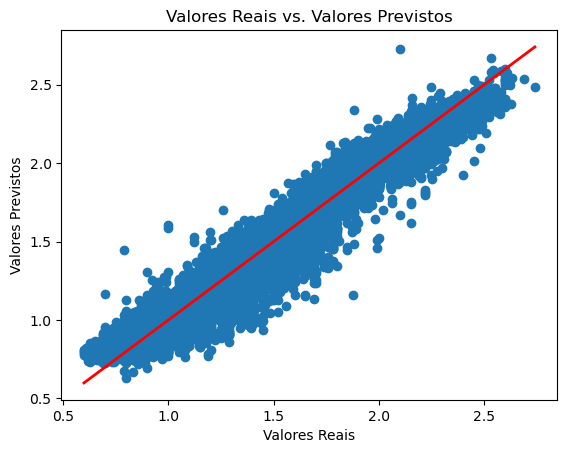

In [22]:
# Visualizar os resultados
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2) # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()

# Gráfico de Distribuição dos Resíduos

Para verificar a normalidade dos resíduos, vou plotar a distribuição deles.

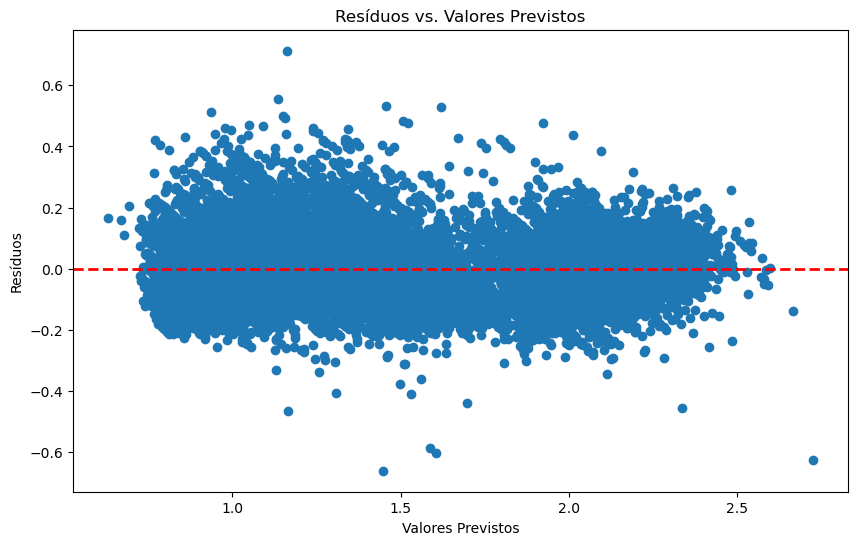

In [23]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', lw=2, linestyle='--')  # Linha de referência em zero
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos')
plt.show()


# Gráfico de Distribuição dos Resíduos

Para verificar a normalidade dos resíduos.

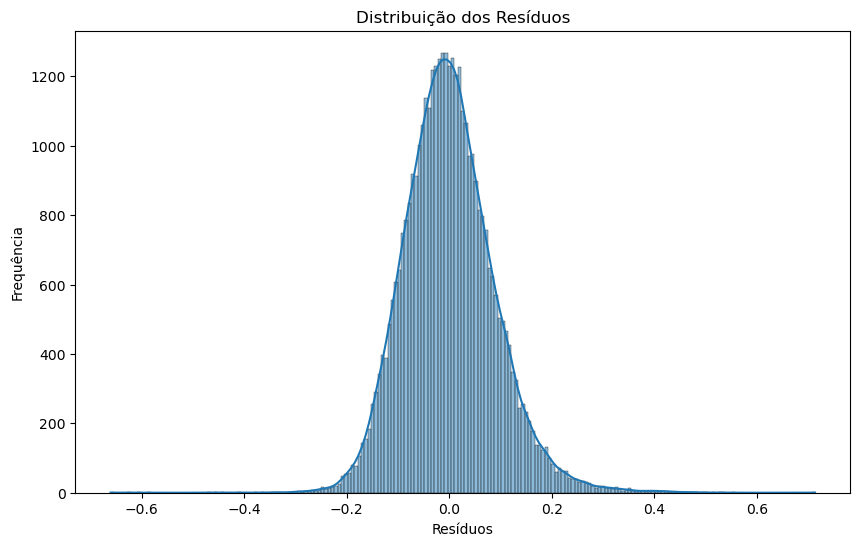

In [30]:
residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()



# Gráfico de Boxplot dos Resíduos

Um boxplot pode ajudar a visualizar a mediana, quartis e possíveis outliers nos resíduos.

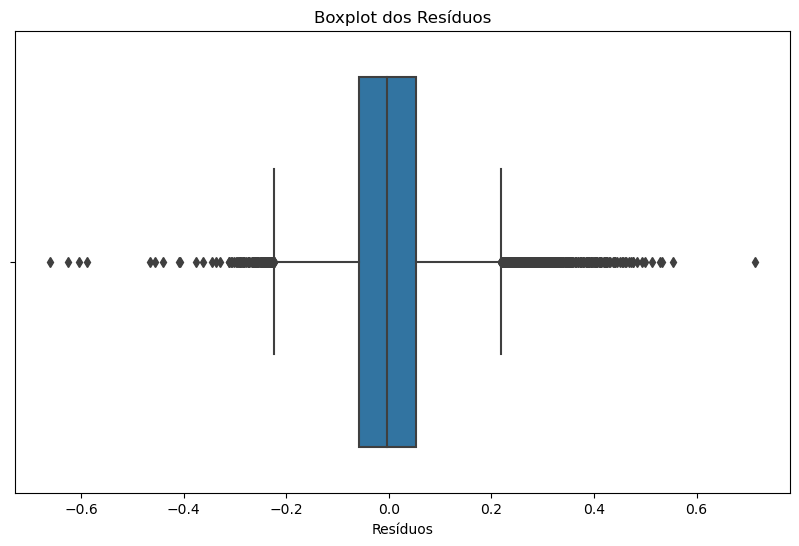

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=residuos)
plt.title('Boxplot dos Resíduos')
plt.xlabel('Resíduos')
plt.show()



# Gráfico de Calibração

Um gráfico de calibração mostra a relação entre os valores reais e os valores previstos.

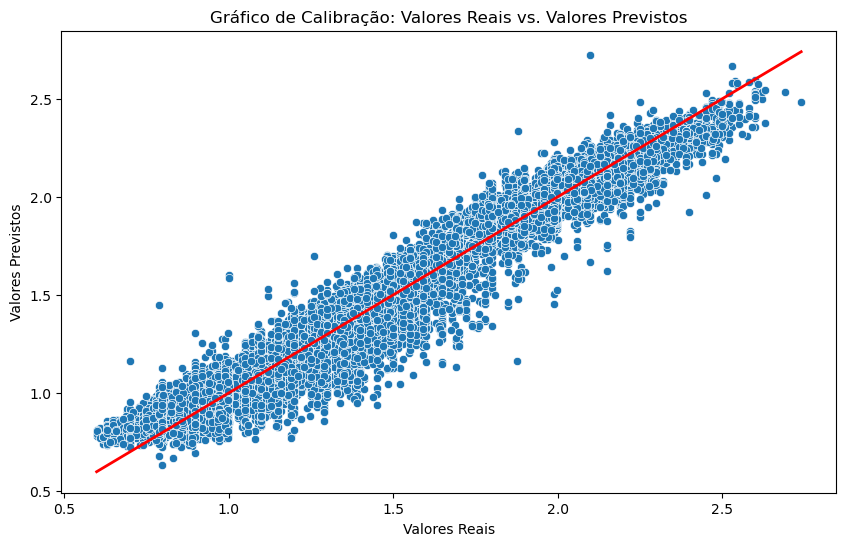

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Calibração: Valores Reais vs. Valores Previstos')
plt.show()



# Gráfico de Violino dos Resíduos

Um gráfico de violino mostra a distribuição dos resíduos, combinando características de um boxplot e um gráfico de densidade.

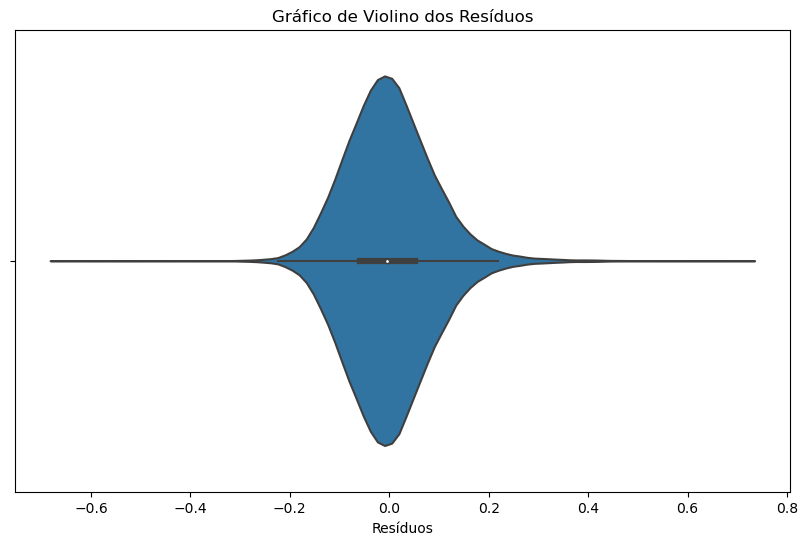

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=residuos)
plt.title('Gráfico de Violino dos Resíduos')
plt.xlabel('Resíduos')
plt.show()



# Gráfico de Densidade

Nesse gráfico de densidade podemos ver como os valores reais e previstos se distribuem em um único gráfico.

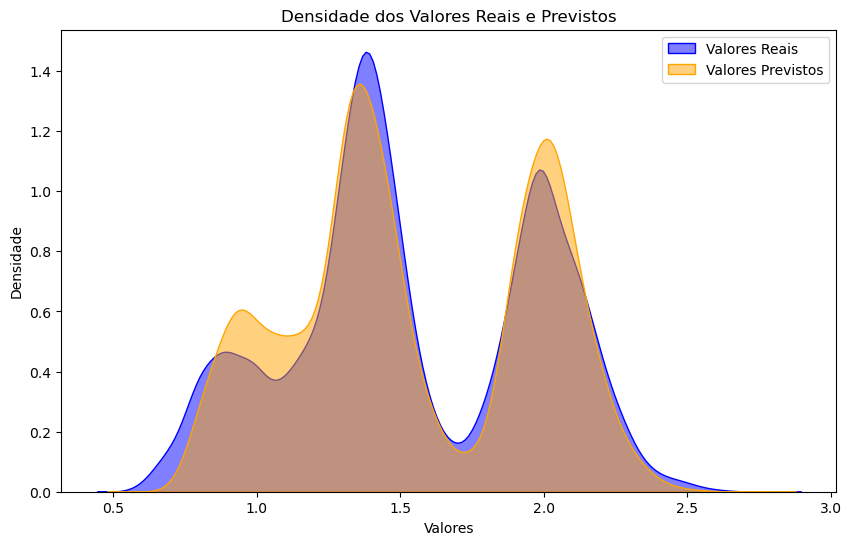

In [37]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Valores Reais', color='blue', fill=True, alpha=0.5)
sns.kdeplot(y_pred, label='Valores Previstos', color='orange', fill=True, alpha=0.5)
plt.title('Densidade dos Valores Reais e Previstos')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.legend()
plt.show()


# Fonte dos dados utilizados nesse projeto

### Dados.gov.br serie historica de preços de combustíveis no Brasil

Linck https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp